<a href="https://colab.research.google.com/github/ShivamVPatil/PricePrediction/blob/main/GoldPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


Data Collection and Processing

In [ ]:
#csv to pandas dataframe

In [ ]:
gold_data= pd.read_csv('/content/daily_gold_rate.csv') 

In [ ]:
gold_data.head()

,Date,USD,EUR,GBP,INR,AED,CNY
0,1985-01-01,308.30,402.45,266.01,3825.85,1134.42,NaN
1,1985-01-02,305.50,401.49,266.00,3787.05,1134.42,NaN
2,1985-01-03,302.30,397.08,262.76,3718.88,1107.67,NaN
3,1985-01-04,303.15,397.15,262.58,3759.64,1118.21,NaN
4,1985-01-07,298.25,392.55,261.17,3741.23,1091.58,835.8


In [ ]:
gold_data.tail()

,Date,USD,EUR,GBP,INR,AED,CNY
9664,2022-01-17,1817.85,1594.19,1331.81,134957.19,6677.05,11538.53
9665,2022-01-18,1817.25,1602.09,1337.93,135535.05,6674.85,11542.45
9666,2022-01-19,1826.95,1610.36,1340.49,135995.87,6710.48,11605.15
9667,2022-01-20,1845.35,1626.15,1351.36,137492.42,6778.06,11704.50
9668,2022-01-21,1837.60,1619.46,1355.71,136769.18,6749.60,11649.28


In [ ]:
gold_data.shape

(9669, 7)

In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9669 entries, 0 to 9668
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9669 non-null   object 
 1   USD     9669 non-null   float64
 2   EUR     9669 non-null   float64
 3   GBP     9669 non-null   float64
 4   INR     9669 non-null   float64
 5   AED     9669 non-null   float64
 6   CNY     9665 non-null   float64
dtypes: float64(6), object(1)
memory usage: 528.9+ KB


In [ ]:
gold_data.isnull().sum()

Date    0
USD     0
EUR     0
GBP     0
INR     0
AED     0
CNY     4
dtype: int64

In [ ]:
gold_data.describe()

,USD,EUR,GBP,INR,AED,CNY
count,9669.000000,9669.000000,9669.000000,9669.000000,9669.000000,9665.000000
mean,750.833871,620.479234,496.608374,39071.461722,2757.624828,4962.734379
std,506.076245,410.477143,371.560247,38033.058611,1858.985818,3359.006210
min,252.800000,222.200000,157.150000,3687.170000,928.530000,809.630000
25%,353.800000,305.120000,219.310000,11584.750000,1297.540000,2185.230000
50%,424.550000,361.140000,259.100000,16913.480000,1559.510000,3307.720000
75%,1232.250000,1013.090000,816.530000,75724.770000,4526.240000,8074.570000
max,2067.150000,1745.460000,1572.810000,154901.870000,7592.950000,14355.530000


In [ ]:
correlation = gold_data.corr()

In [ ]:
#Constructing a heatmap to understand correlation

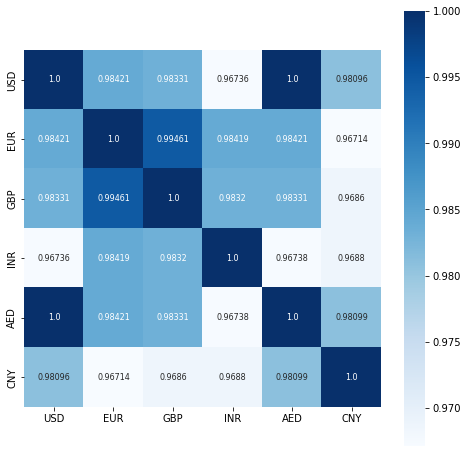

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True ,square=True,fmt='0.5' ,annot=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
print(correlation['INR'])

USD    0.967365
EUR    0.984190
GBP    0.983196
INR    1.000000
AED    0.967383
CNY    0.968798
Name: INR, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


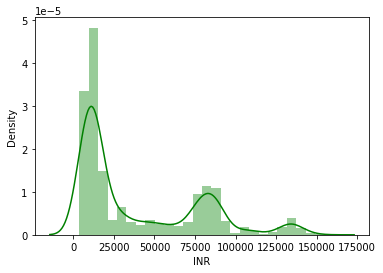

In [ ]:
#check the distribution of the gold price 
sns.distplot(gold_data['INR'],color='green')

In [ ]:
#Splitting the features and target price

In [ ]:
X=gold_data.drop(['Date','INR','CNY'],axis= 1)
Y=gold_data['INR']

In [ ]:
print(X)

          USD      EUR      GBP      AED
0      308.30   402.45   266.01  1134.42
1      305.50   401.49   266.00  1134.42
2      302.30   397.08   262.76  1107.67
3      303.15   397.15   262.58  1118.21
4      298.25   392.55   261.17  1091.58
...       ...      ...      ...      ...
9664  1817.85  1594.19  1331.81  6677.05
9665  1817.25  1602.09  1337.93  6674.85
9666  1826.95  1610.36  1340.49  6710.48
9667  1845.35  1626.15  1351.36  6778.06
9668  1837.60  1619.46  1355.71  6749.60

[9669 rows x 4 columns]


In [ ]:
print(Y)

0         3825.85
1         3787.05
2         3718.88
3         3759.64
4         3741.23
          ...    
9664    134957.19
9665    135535.05
9666    135995.87
9667    137492.42
9668    136769.18
Name: INR, Length: 9669, dtype: float64


In [ ]:
#Splitting into training data and test data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [ ]:
#Model Training:RANDOM FOREST REGRESSOR

In [ ]:
regressor=RandomForestRegressor(n_estimators=100)


In [ ]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
#Model evaluation
#Prediction on test data

test_data_prediction= regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[ 16741.0468  27621.4553  45696.9855 ...  89976.7469  12182.9366
 105690.8994]


In [ ]:
#R squared error
error_score= metrics.r2_score(Y_test,test_data_prediction)
print("R squared error :",error_score)

R squared error : 0.9965889364119246


In [ ]:
#Compare Actual values with Predicted values in plot

In [ ]:
Y_test=list(Y_test)

<function matplotlib.pyplot.show>

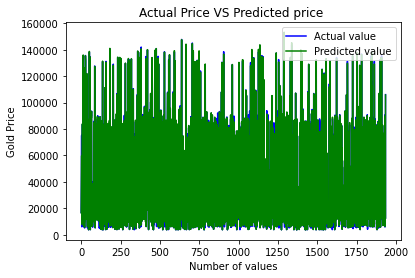

In [ ]:
plt.plot(Y_test,color='Blue',label = 'Actual value')
plt.plot(test_data_prediction,color='Green',label ='Predicted value')
plt.title('Actual Price VS Predicted price ')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show